In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("layout_data.csv")  # Update with the correct path if needed

# Display column names
print("Columns in the dataset:")
print(df.columns)

# Display first few rows
print("\nSample data:")
print(df.head())



Columns in the dataset:
Index(['Room Width', 'Room Height', 'Furniture Type', 'Furniture X',
       'Furniture Y', 'Furniture Width', 'Furniture Height', 'Obstacle Type',
       'Obstacle X', 'Obstacle Y', 'Obstacle Width', 'Obstacle Height'],
      dtype='object')

Sample data:
   Room Width  Room Height Furniture Type  Furniture X  Furniture Y  \
0           6            6          Chair            4            0   
1           9           14           Sofa            5            3   
2          12           14           Sofa            2            0   
3          12            8           Sofa            0            6   
4          14            8          Table            8            0   

   Furniture Width  Furniture Height Obstacle Type  Obstacle X  Obstacle Y  \
0                1                 1  Fixed Object           0           0   
1                1                 3        Pillar           1           7   
2                3                 3        Pillar         

In [2]:
print(df.isnull().sum())

Room Width          0
Room Height         0
Furniture Type      0
Furniture X         0
Furniture Y         0
Furniture Width     0
Furniture Height    0
Obstacle Type       0
Obstacle X          0
Obstacle Y          0
Obstacle Width      0
Obstacle Height     0
dtype: int64


In [3]:
print(df.describe())


       Room Width  Room Height  Furniture X  Furniture Y  Furniture Width  \
count  100.000000   100.000000   100.000000   100.000000       100.000000   
mean     9.480000     9.520000     3.460000     3.540000         1.450000   
std      2.709803     2.879675     2.822779     2.801226         0.657129   
min      5.000000     5.000000     0.000000     0.000000         1.000000   
25%      7.000000     7.000000     1.000000     1.000000         1.000000   
50%     10.000000    10.000000     3.000000     3.000000         1.000000   
75%     12.000000    11.250000     5.000000     5.000000         2.000000   
max     14.000000    14.000000    11.000000    11.000000         3.000000   

       Furniture Height  Obstacle X  Obstacle Y  Obstacle Width  \
count        100.000000  100.000000  100.000000      100.000000   
mean           1.430000    3.010000    3.400000        2.200000   
std            0.623691    2.488336    2.632355        1.206045   
min            1.000000    0.000000   

In [4]:
print(df['Furniture Type'].value_counts())
print(df['Obstacle Type'].value_counts())

Sofa     28
Table    27
Chair    24
Bed      21
Name: Furniture Type, dtype: int64
Wall            37
Pillar          33
Fixed Object    30
Name: Obstacle Type, dtype: int64


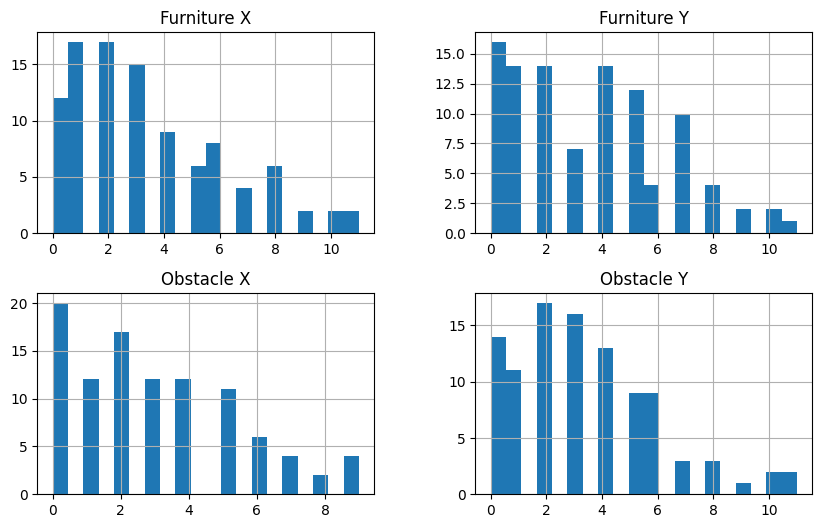

In [5]:
import matplotlib.pyplot as plt
df[['Furniture X', 'Furniture Y', 'Obstacle X', 'Obstacle Y']].hist(figsize=(10, 6), bins=20)
plt.show()


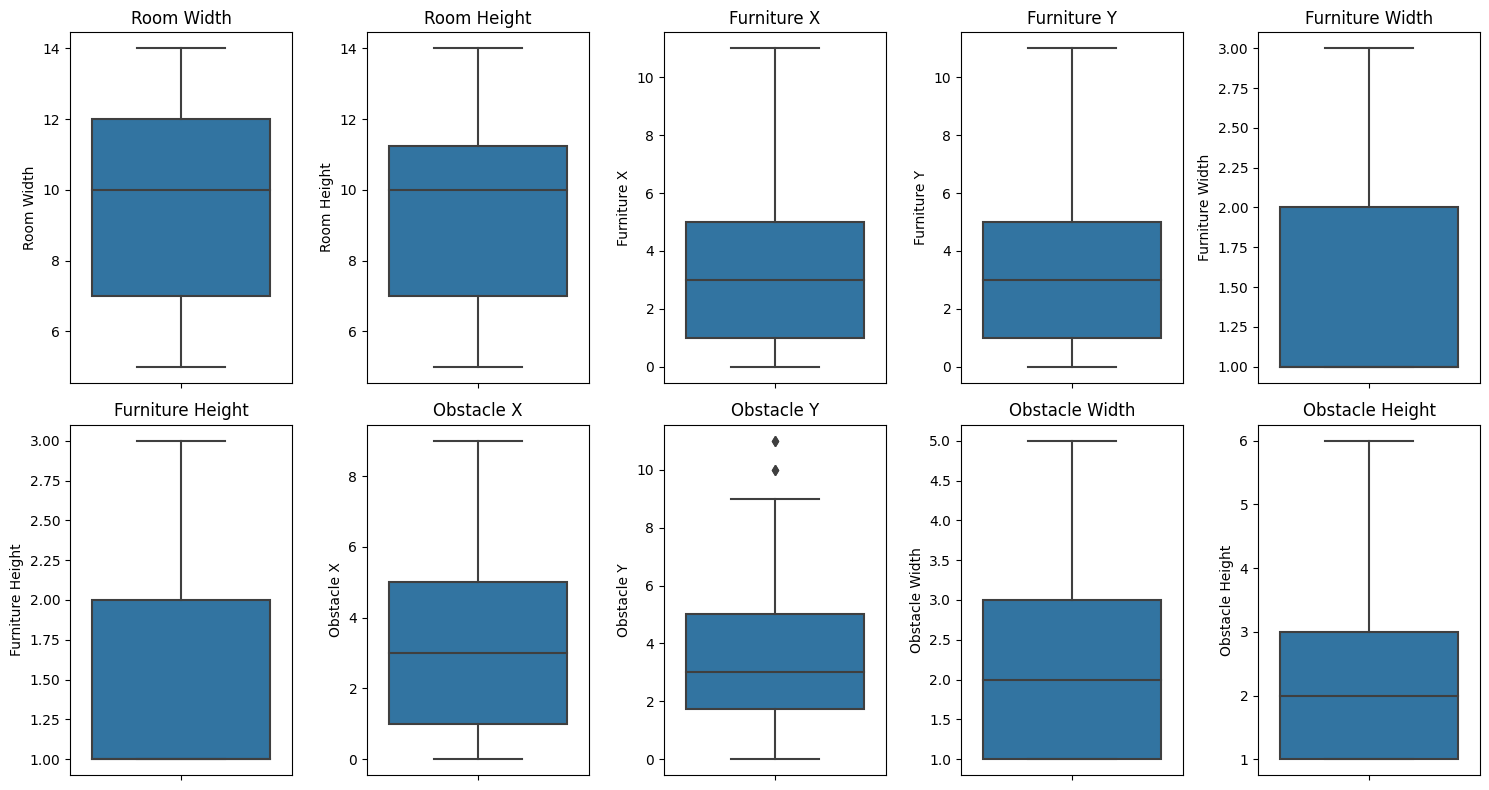

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = ['Room Width', 'Room Height', 'Furniture X', 'Furniture Y', 
                   'Furniture Width', 'Furniture Height', 'Obstacle X', 'Obstacle Y', 
                   'Obstacle Width', 'Obstacle Height']

# Create boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Assuming df is the DataFrame
df_encoded = pd.get_dummies(df, columns=['Furniture Type', 'Obstacle Type'], drop_first=True)

# Display first few rows to check encoding
df_encoded.head()


,Room Width,Room Height,Furniture X,Furniture Y,Furniture Width,Furniture Height,Obstacle X,Obstacle Y,Obstacle Width,Obstacle Height,Furniture Type_Chair,Furniture Type_Sofa,Furniture Type_Table,Obstacle Type_Pillar,Obstacle Type_Wall
0,6,6,4,0,1,1,0,0,1,2,1,0,0,0,0
1,9,14,5,3,1,3,1,7,3,5,0,1,0,1,0
2,12,14,2,0,3,3,1,6,1,1,0,1,0,1,0
3,12,8,0,6,3,1,4,2,4,2,0,1,0,0,0
4,14,8,8,0,3,1,9,6,4,1,0,0,1,1,0


In [8]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding already encoded categorical features)
num_cols = ['Room Width', 'Room Height', 'Furniture X', 'Furniture Y', 
            'Furniture Width', 'Furniture Height', 'Obstacle X', 
            'Obstacle Y', 'Obstacle Width', 'Obstacle Height']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Display first few rows to check the transformation
df_encoded.head()


,Room Width,Room Height,Furniture X,Furniture Y,Furniture Width,Furniture Height,Obstacle X,Obstacle Y,Obstacle Width,Obstacle Height,Furniture Type_Chair,Furniture Type_Sofa,Furniture Type_Table,Obstacle Type_Pillar,Obstacle Type_Wall
0,-1.290696,-1.228518,0.192265,-1.270099,-0.688247,-0.692918,-1.215737,-1.298126,-1.000000,-0.160930,1,0,0,0,0
1,-0.178027,1.563569,0.548310,-0.193744,-0.688247,2.529956,-0.811838,1.374486,0.666667,2.380074,0,1,0,1,0
2,0.934642,1.563569,-0.519826,-1.270099,2.370629,2.529956,-0.811838,0.992685,-1.000000,-1.007932,0,1,0,1,0
3,0.934642,-0.530497,-1.231918,0.882611,2.370629,-0.692918,0.399860,-0.534522,1.500000,-0.160930,0,1,0,0,0
4,1.676421,-0.530497,1.616447,-1.270099,2.370629,-0.692918,2.419358,0.992685,1.500000,-1.007932,0,0,1,1,0


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Furniture Type', 'Obstacle Type'], dtype='object')

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
# Define features and target variables
X = df_encoded.drop(columns=["Furniture X", "Furniture Y"])
y = df_encoded[["Furniture X", "Furniture Y"]]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the trained model
joblib.dump(rf_model, "furniture_placement_rf_model.pkl")


Mean Squared Error: 1.0366319306793597


['furniture_placement_rf_model.pkl']

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)


Mean Squared Error (XGBoost): 1.1522515470411574


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)  # Output layer for predicting (x, y) coordinates
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (Neural Network): {mse}")
print(f"Mean Absolute Error (Neural Network): {mae}")

# Predict
y_pred = model.predict(X_test)


Epoch 1/100
5/5 [==============================] - 1s 90ms/step - loss: 1.0467 - mae: 0.8247 - val_loss: 1.0736 - val_mae: 0.8477
Epoch 2/100
5/5 [==============================] - 0s 19ms/step - loss: 0.9177 - mae: 0.7758 - val_loss: 1.0642 - val_mae: 0.8457
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.8326 - mae: 0.7375 - val_loss: 1.0723 - val_mae: 0.8488
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.7851 - mae: 0.7128 - val_loss: 1.0729 - val_mae: 0.8512
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.7468 - mae: 0.6938 - val_loss: 1.0762 - val_mae: 0.8504
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7182 - mae: 0.6771 - val_loss: 1.0693 - val_mae: 0.8453
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6857 - mae: 0.6607 - val_loss: 1.0518 - val_mae: 0.8365
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6601 - mae: 0.647

5/5 [==============================] - 0s 15ms/step - loss: 0.0549 - mae: 0.1741 - val_loss: 1.0144 - val_mae: 0.7641
Epoch 64/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0524 - mae: 0.1693 - val_loss: 1.0209 - val_mae: 0.7701
Epoch 65/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0500 - mae: 0.1656 - val_loss: 1.0177 - val_mae: 0.7688
Epoch 66/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0479 - mae: 0.1616 - val_loss: 1.0064 - val_mae: 0.7606
Epoch 67/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0455 - mae: 0.1566 - val_loss: 1.0146 - val_mae: 0.7638
Epoch 68/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0434 - mae: 0.1517 - val_loss: 1.0303 - val_mae: 0.7705
Epoch 69/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0415 - mae: 0.1479 - val_loss: 1.0208 - val_mae: 0.7612
Epoch 70/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0401 - mae: 0.1460 - 

In [14]:
import joblib
joblib.dump(model, "furniture_placement_model.pkl")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2025-03-10 15:36:51         1802
metadata.json                                  2025-03-10 15:36:51           64
variables.h5                                   2025-03-10 15:36:51        57848


['furniture_placement_model.pkl']